In [82]:
import polars as pl
import matplotlib.pyplot as plt
import polars.selectors as cs
import seaborn as sns
from sklearn.preprocessing import RobustScaler

%matplotlib inline

In [15]:
df = pl.read_csv('dataset/Churn_Modelling.csv')

In [16]:
df.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
i64,i64,str,i64,str,str,i64,i64,f64,i64,i64,i64,f64,i64
1,15634602,"""Hargrave""",619,"""France""","""Female""",42,2,0.0,1,1,1,101348.88,1
2,15647311,"""Hill""",608,"""Spain""","""Female""",41,1,83807.86,1,0,1,112542.58,0
3,15619304,"""Onio""",502,"""France""","""Female""",42,8,159660.8,3,1,0,113931.57,1
4,15701354,"""Boni""",699,"""France""","""Female""",39,1,0.0,2,0,0,93826.63,0
5,15737888,"""Mitchell""",850,"""Spain""","""Female""",43,2,125510.82,1,1,1,79084.1,0


In [17]:
df.shape

(10000, 14)

In [24]:
# missing values
df.null_count()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df.select(pl.col("Geography").n_unique())

Geography
u32
3


In [19]:
df.select(pl.col("Geography").value_counts())

Geography
struct[2]
"{""France"",5014}"
"{""Spain"",2477}"
"{""Germany"",2509}"


In [10]:
df.select(pl.col("Surname").n_unique())

Surname
u32
2932


### Visualizing data

In [76]:
sns.set_theme(context='notebook', palette='deep')

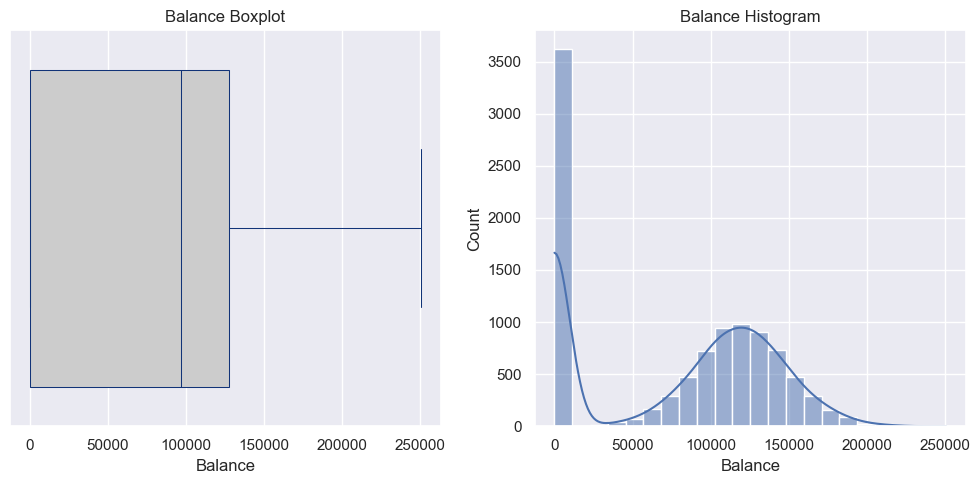

In [77]:
# Balance column
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(df, x='Balance', color=".8", linecolor="#137", linewidth=.75)
ax1.set_title("Balance Boxplot")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(df, x='Balance', kde=True)
ax2.set_title("Balance Histogram")

plt.tight_layout()  
plt.show()

In [57]:
df['Balance'].describe()

statistic,value
str,f64
"""count""",10000.0
"""null_count""",0.0
"""mean""",76485.889288
"""std""",62397.405202
"""min""",0.0
"""25%""",0.0
"""50%""",97208.46
"""75%""",127642.44
"""max""",250898.09


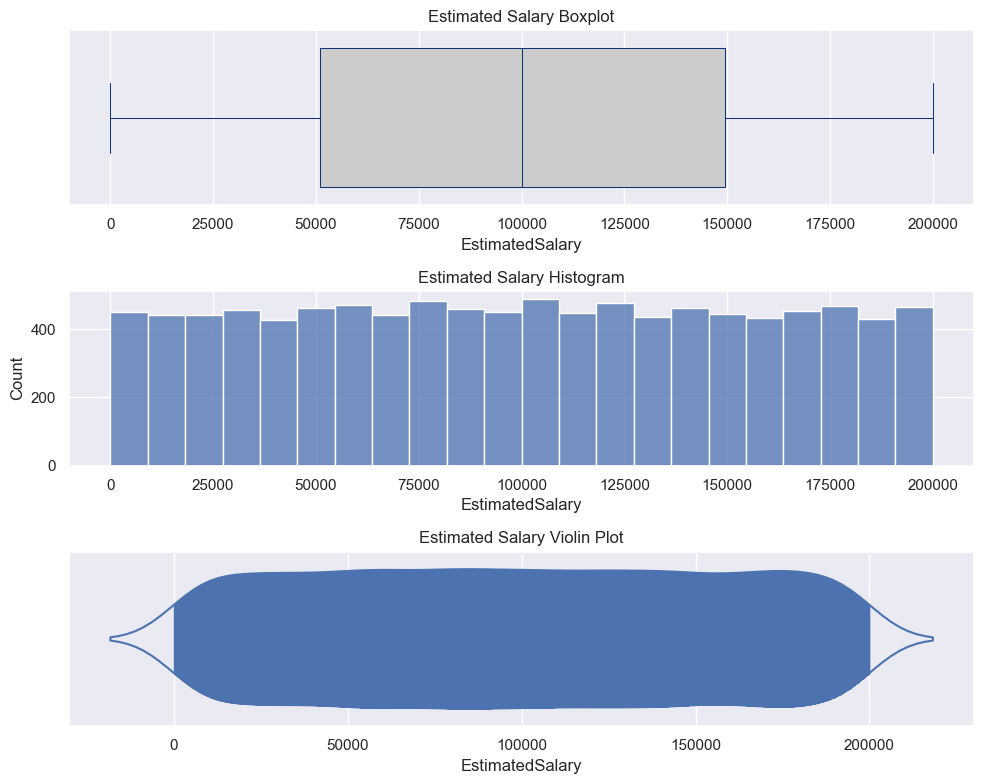

In [78]:
# Estimated Salary column
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(3,1,1)
sns.boxplot(df, x='EstimatedSalary', color=".8", linecolor="#137", linewidth=.75)
ax1.set_title("Estimated Salary Boxplot")

ax2 = fig.add_subplot(3,1,2)
sns.histplot(df, x='EstimatedSalary')
ax2.set_title("Estimated Salary Histogram")

ax2 = fig.add_subplot(3,1,3)
sns.violinplot(df, x='EstimatedSalary', inner="stick", density_norm="count", fill=False)
ax2.set_title("Estimated Salary Violin Plot")

plt.tight_layout()  
plt.show()

In [70]:
df['EstimatedSalary'].describe()

statistic,value
str,f64
"""count""",10000.0
"""null_count""",0.0
"""mean""",100090.239881
"""std""",57510.492818
"""min""",11.58
"""25%""",51011.29
"""50%""",100200.4
"""75%""",149384.43
"""max""",199992.48


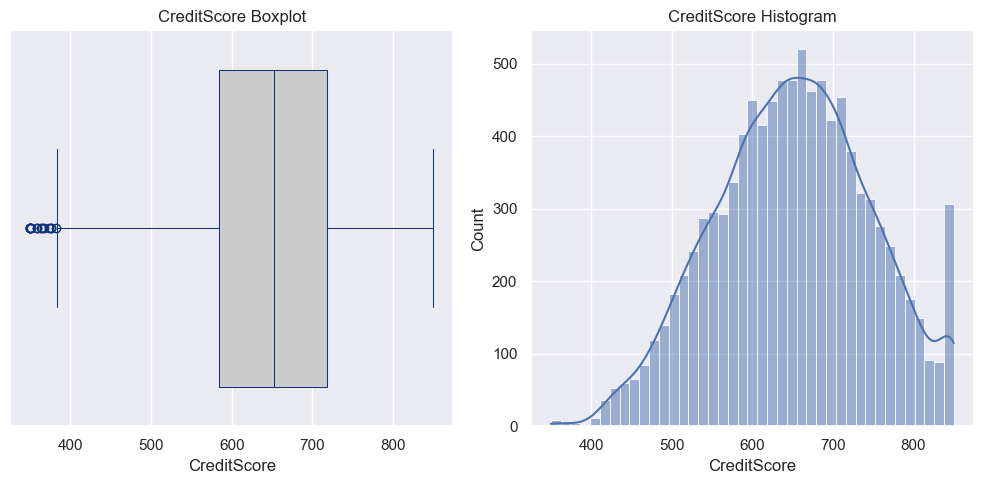

In [79]:
# Credit Score column
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(df, x='CreditScore', color=".8", linecolor="#137", linewidth=.75)
ax1.set_title("CreditScore Boxplot")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(df, x='CreditScore', kde=True)
ax2.set_title("CreditScore Histogram")

plt.tight_layout()  
plt.show()

In [72]:
df['CreditScore'].describe()

statistic,value
str,f64
"""count""",10000.0
"""null_count""",0.0
"""mean""",650.5288
"""std""",96.653299
"""min""",350.0
"""25%""",584.0
"""50%""",652.0
"""75%""",718.0
"""max""",850.0


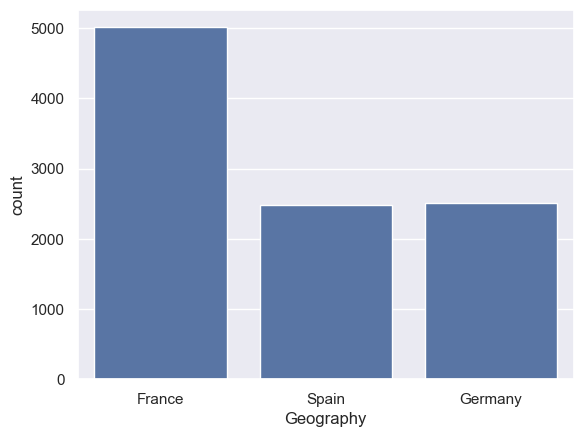

In [80]:
#Geography column
sns.countplot(df, x='Geography')
plt.show()

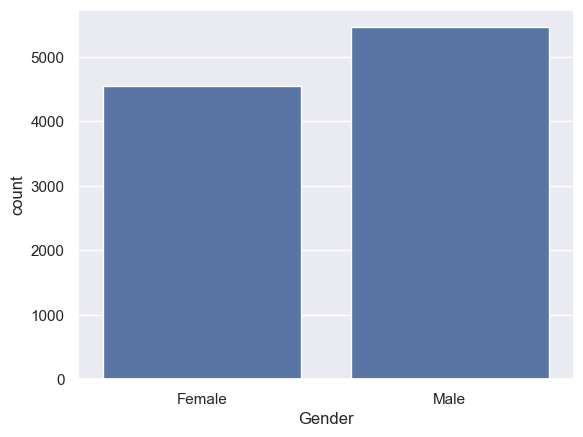

In [81]:
#Gender column
sns.countplot(df, x='Gender')
plt.show()

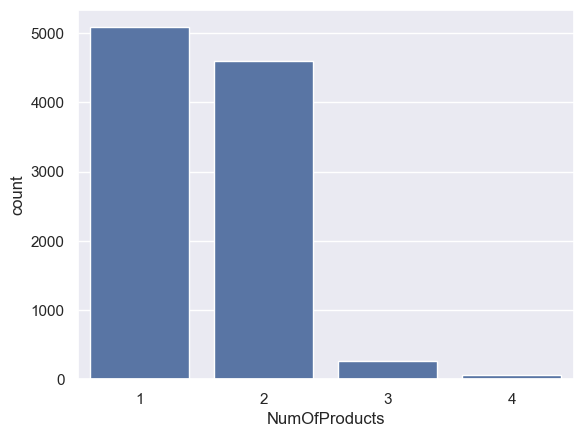

In [85]:
#Number of products column
sns.countplot(df, x='NumOfProducts')
plt.show()

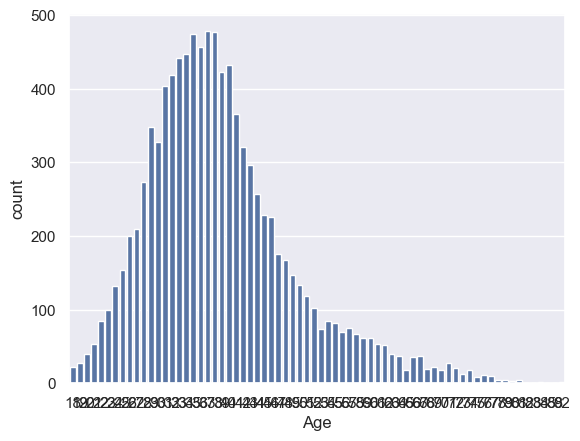

In [86]:
#Age column
sns.countplot(df, x='Age')
plt.show()

In [87]:
df['Age'].describe()

statistic,value
str,f64
"""count""",10000.0
"""null_count""",0.0
"""mean""",38.9218
"""std""",10.487806
"""min""",18.0
"""25%""",32.0
"""50%""",37.0
"""75%""",44.0
"""max""",92.0


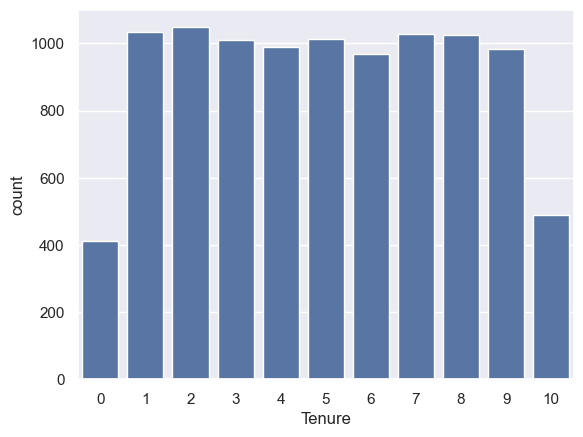

In [89]:
#Tenure column
sns.countplot(df, x='Tenure')
plt.show()

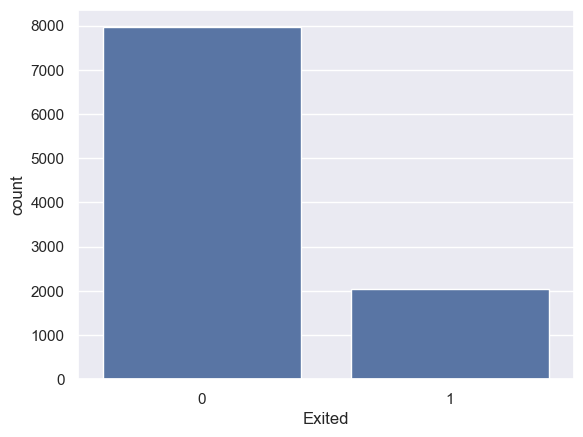

In [105]:
#Exited column
sns.countplot(df, x='Exited')
plt.show()

In [191]:
print(len(df.filter(pl.col("Exited")==1))/len(df['Exited']))
print(len(df.filter(pl.col("Exited")==0))/len(df['Exited']))

0.2037
0.7963


### Preprocessing

In [20]:
remove_columns = ['RowNumber', 'CustomerId', 'Surname']

In [108]:
filtered_df = df.drop(remove_columns)

In [109]:
filtered_df.head()

CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
i64,str,str,i64,i64,f64,i64,i64,i64,f64,i64
619,"""France""","""Female""",42,2,0.0,1,1,1,101348.88,1
608,"""Spain""","""Female""",41,1,83807.86,1,0,1,112542.58,0
502,"""France""","""Female""",42,8,159660.8,3,1,0,113931.57,1
699,"""France""","""Female""",39,1,0.0,2,0,0,93826.63,0
850,"""Spain""","""Female""",43,2,125510.82,1,1,1,79084.1,0


In [110]:
filtered_df = filtered_df.to_dummies(cs.string(), drop_first=True)

In [111]:
filtered_df.head()

CreditScore,Geography_Germany,Geography_Spain,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
i64,u8,u8,u8,i64,i64,f64,i64,i64,i64,f64,i64
619,0,0,0,42,2,0.0,1,1,1,101348.88,1
608,0,1,0,41,1,83807.86,1,0,1,112542.58,0
502,0,0,0,42,8,159660.8,3,1,0,113931.57,1
699,0,0,0,39,1,0.0,2,0,0,93826.63,0
850,0,1,0,43,2,125510.82,1,1,1,79084.1,0


In [112]:
# Data scaling
scaler = RobustScaler()
scaler.set_output(transform='polars')

RobustScaler()

In [113]:
scale_target_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']

In [114]:
filtered_df[scale_target_columns] = scaler.fit_transform(df[scale_target_columns])

In [115]:
filtered_df.head()

CreditScore,Geography_Germany,Geography_Spain,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
f64,u8,u8,u8,f64,f64,f64,f64,i64,i64,f64,i64
-0.246269,0,0,0,0.416667,-0.75,-0.76148,0.0,1,1,0.011739,1
-0.328358,0,1,0,0.333333,-1.0,-0.104906,0.0,0,1,0.125512,0
-1.119403,0,0,0,0.416667,0.75,0.489346,2.0,1,0,0.13963,1
0.350746,0,0,0,0.166667,-1.0,-0.76148,1.0,0,0,-0.064717,0
1.477612,0,1,0,0.5,-0.75,0.221806,0.0,1,1,-0.214561,0


### Splitting data

In [116]:
from sklearn.model_selection import train_test_split

In [215]:
X = filtered_df.drop('Exited')
y = filtered_df['Exited']

In [217]:
X.head()

CreditScore,Geography_Germany,Geography_Spain,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
f64,u8,u8,u8,f64,f64,f64,f64,i64,i64,f64
-0.246269,0,0,0,0.416667,-0.75,-0.76148,0.0,1,1,0.011739
-0.328358,0,1,0,0.333333,-1.0,-0.104906,0.0,0,1,0.125512
-1.119403,0,0,0,0.416667,0.75,0.489346,2.0,1,0,0.13963
0.350746,0,0,0,0.166667,-1.0,-0.76148,1.0,0,0,-0.064717
1.477612,0,1,0,0.5,-0.75,0.221806,0.0,1,1,-0.214561


In [218]:
print(len(y.filter(y == 1))/len(y))
print(len(y.filter(y == 0))/len(y))

0.2037
0.7963


In [219]:
filtered_df.shape

(10000, 12)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [221]:
X_train.shape, y_train.shape

((8500, 11), (8500,))

### Feature selection with Filter methods

<Axes: >

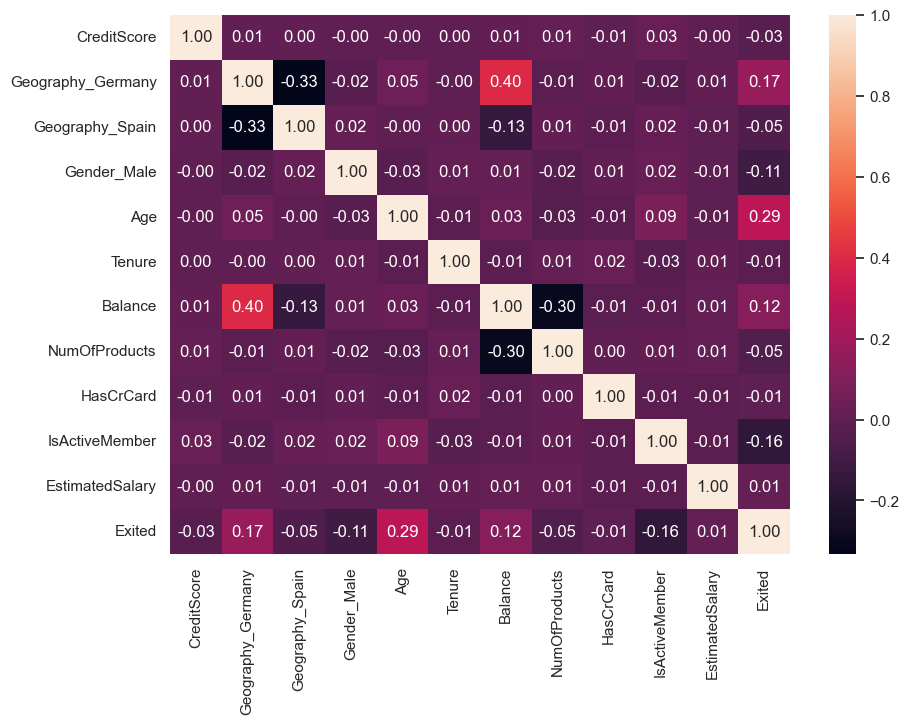

In [222]:
corr = filtered_df.corr()

fig = plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', xticklabels=corr.columns, yticklabels=corr.columns)

In [223]:
from sklearn.feature_selection import VarianceThreshold

v_threshold = VarianceThreshold(threshold=0.1)
v_threshold.fit(X)
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

### Models

In [184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [254]:
results = {}

### Logistic Regression

In [342]:
from sklearn.linear_model import LogisticRegression 

In [343]:
lr_model = LogisticRegression(n_jobs=-1)

In [344]:
lr_model.fit(X_train, y_train)
lr_model.score(X_train, y_train)

0.8104705882352942

In [345]:
# Predictions
y_pred = lr_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.8026666666666666
Precision: 0.5431034482758621
Recall: 0.20588235294117646
F1 Score: 0.2985781990521327


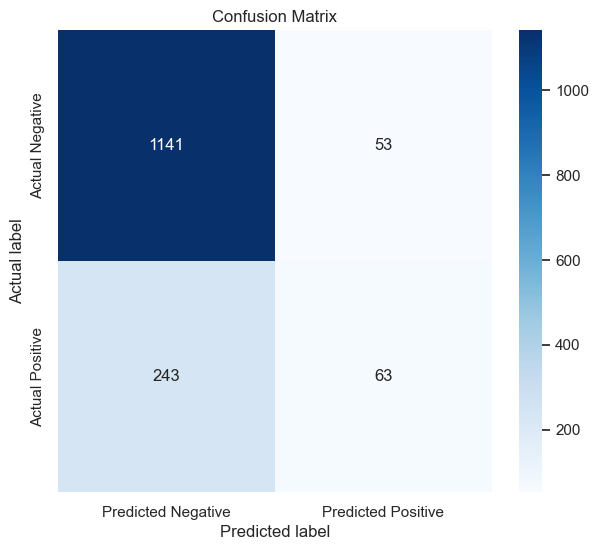

In [346]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [347]:
y_prob = lr_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.7604361677669392


In [348]:
results['LogisticRegression'] = [accuracy, precision, recall, f1, roc_auc]

### Decision Tree

In [349]:
from sklearn.tree import DecisionTreeClassifier

In [350]:
tree_model = DecisionTreeClassifier()

In [351]:
tree_model.fit(X_train, y_train)
tree_model.score(X_train, y_train)

1.0

In [352]:
# Predictions
y_pred = tree_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.7713333333333333
Precision: 0.446064139941691
Recall: 0.5
F1 Score: 0.4714946070878274


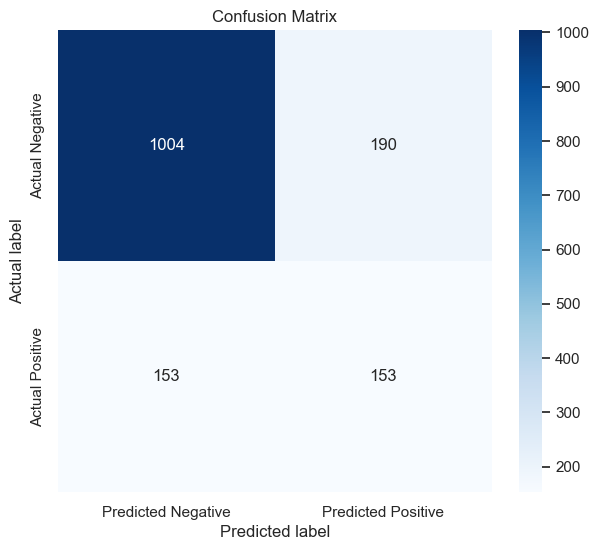

In [353]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [354]:
y_prob = tree_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.6704355108877722


In [355]:
results['DecisionTreeClassifier'] = [accuracy, precision, recall, f1, roc_auc]

In [356]:
from sklearn.tree import plot_tree

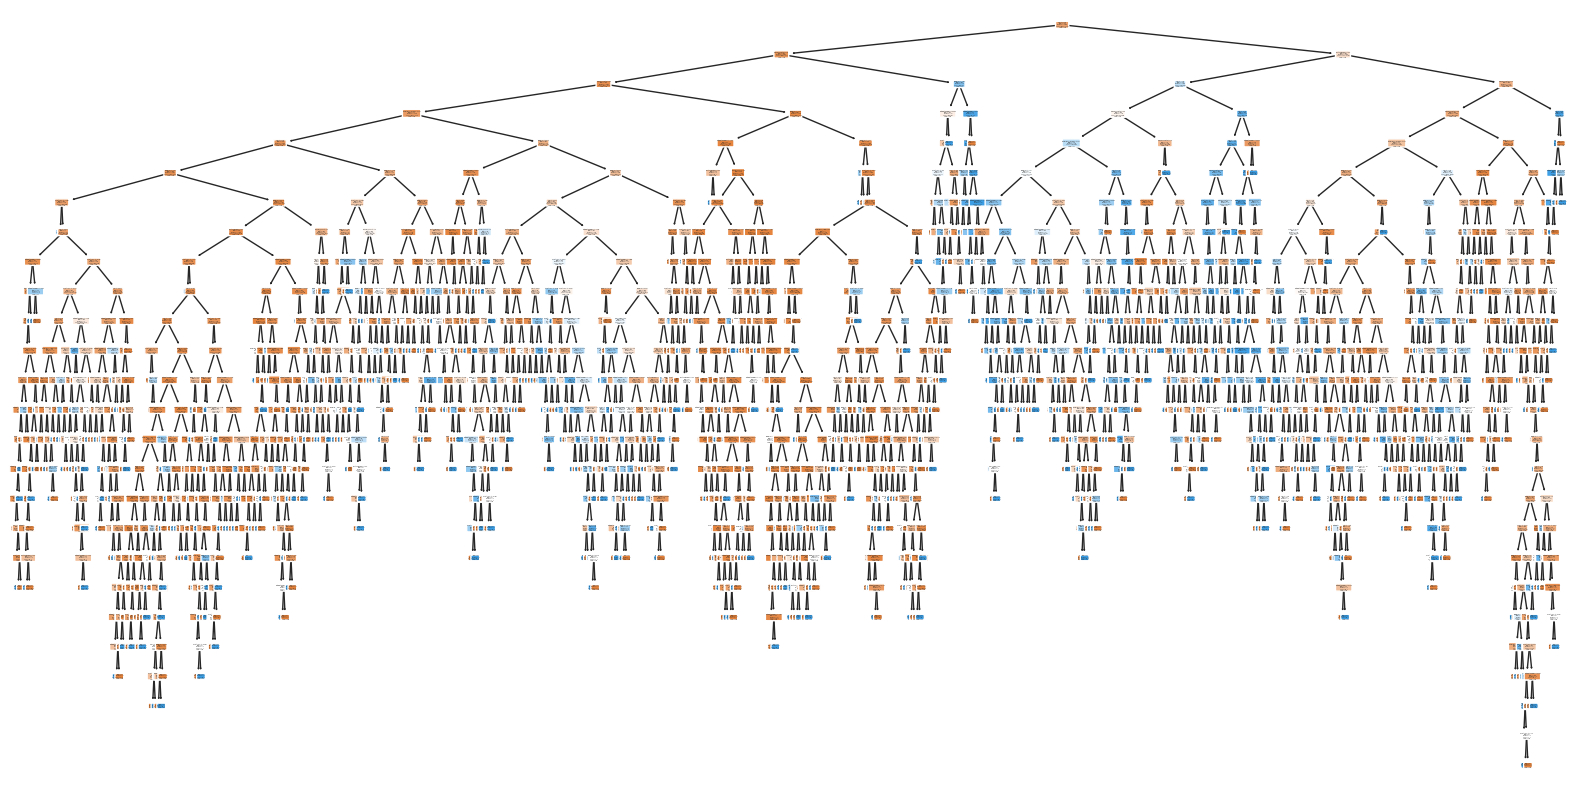

In [357]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, rounded=True, class_names=True, feature_names=X.columns)
plt.show()

### Boosting

In [358]:
import xgboost as xgb

In [359]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [360]:
xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train)

c:\Users\pcteste1\Documents\Gitkraken\CODSOFT\Movie Genre Classification\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:01:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.9552941176470588

In [361]:
# Predictions
y_pred = xgb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.8466666666666667
Precision: 0.668141592920354
Recall: 0.4934640522875817
F1 Score: 0.5676691729323309


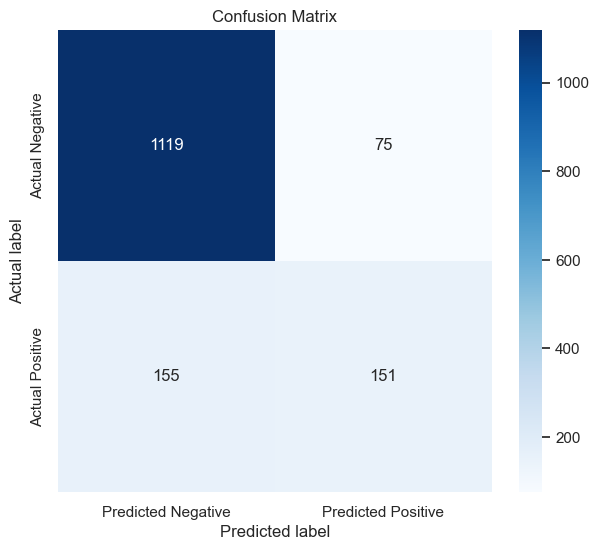

In [362]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [363]:
y_prob =  xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.8306948686789065


In [364]:
results['XGBClassifier'] = [accuracy, precision, recall, f1, roc_auc]

### SVM

In [365]:
from sklearn.svm import SVC

In [366]:
svc_model = SVC()

In [367]:
svc_model.fit(X_train, y_train)
svc_model.score(X_train, y_train)

0.8652941176470588

In [368]:
# Predictions
y_pred = svc_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.8593333333333333
Precision: 0.8187919463087249
Recall: 0.39869281045751637
F1 Score: 0.5362637362637362


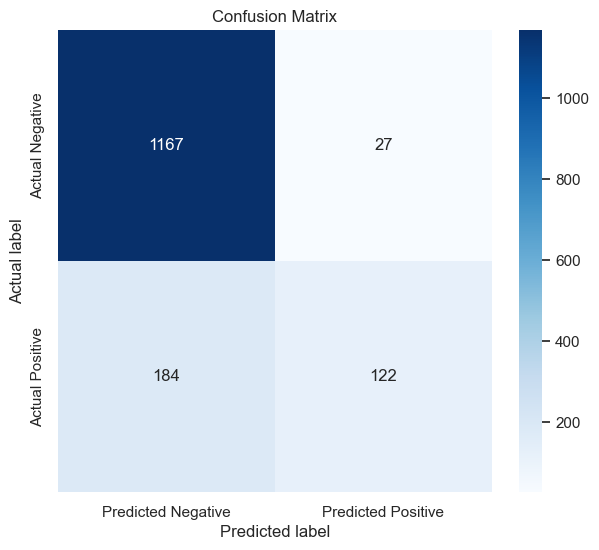

In [369]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [380]:
results['SVC'] = [accuracy, precision, recall, f1, 0.0]

### LDA

In [381]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [382]:
lda_classifier = LDA()

In [383]:
lda_classifier.fit(X_train, y_train)
lda_classifier.score(X_train, y_train)

0.8083529411764706

In [384]:
# Predictions
y_pred = lda_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

Accuracy: 0.7993333333333333
Precision: 0.518796992481203
Recall: 0.22549019607843138
F1 Score: 0.3143507972665148


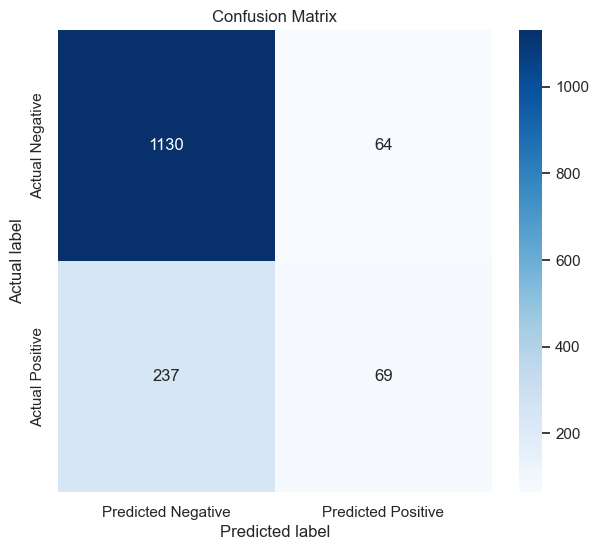

In [385]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [386]:
y_prob =  lda_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.760720815406006


In [387]:
results['LinearDiscriminantAnalysis'] = [accuracy, precision, recall, f1, roc_auc]

### Results

In [388]:
results
#'Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC Score'

{'LogisticRegression': [0.8026666666666666,
  0.5431034482758621,
  0.20588235294117646,
  0.2985781990521327,
  0.7604361677669392],
 'DecisionTreeClassifier': [0.7713333333333333,
  0.446064139941691,
  0.5,
  0.4714946070878274,
  0.6704355108877722],
 'XGBClassifier': [0.8466666666666667,
  0.668141592920354,
  0.4934640522875817,
  0.5676691729323309,
  0.8306948686789065],
 'SVC': [0.7993333333333333,
  0.518796992481203,
  0.22549019607843138,
  0.3143507972665148,
  0.0],
 'LinearDiscriminantAnalysis': [0.7993333333333333,
  0.518796992481203,
  0.22549019607843138,
  0.3143507972665148,
  0.760720815406006]}

In [420]:
results_df = pl.DataFrame(results)
results_df.transpose(include_header=True, header_name='Model', column_names=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC Score'])

Model,Accuracy,Precision,Recall,F1,ROC AUC Score
str,f64,f64,f64,f64,f64
"""LogisticRegression""",0.802667,0.543103,0.205882,0.298578,0.760436
"""DecisionTreeClassifier""",0.771333,0.446064,0.5,0.471495,0.670436
"""XGBClassifier""",0.846667,0.668142,0.493464,0.567669,0.830695
"""SVC""",0.799333,0.518797,0.22549,0.314351,0.0
"""LinearDiscriminantAnalysis""",0.799333,0.518797,0.22549,0.314351,0.760721


<Axes: >

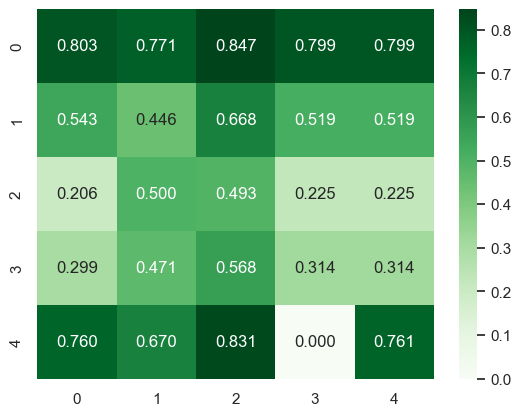

In [421]:
sns.heatmap(results_df, annot=True, fmt='.3f', cmap="Greens")